In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

In [2]:
ujindoor_dir = "../../ujiindoorloc/UJIndoorLoc/trainingData.csv"
ujindoor_df = pd.read_csv(ujindoor_dir)

In [3]:
ujindoor_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [11]:
ujindoor_df[ujindoor_df["RELATIVEPOSITION"] == 1]["SPACEID"].value_counts()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128
10,100,100,100,100,100,100,100,-83,100,100,...,100,-7528.816402,4.864959e+06,2,1,104,1,2,23,1371714200
18,100,100,100,100,100,100,100,100,100,100,...,100,-7521.867186,4.864889e+06,2,1,29,1,2,23,1371714802
20,100,100,100,100,100,100,100,100,100,-94,...,100,-7526.710927,4.864893e+06,2,1,15,1,2,23,1371714772
22,100,100,100,100,100,100,100,100,100,100,...,100,-7512.604164,4.864885e+06,2,1,16,1,2,23,1371714946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19908,100,100,100,100,100,100,100,100,100,100,...,100,-7539.413493,4.864924e+06,3,1,104,1,18,10,1371709520
19909,100,100,100,100,100,100,100,100,100,100,...,100,-7526.320097,4.864920e+06,3,1,101,1,18,10,1371709586
19912,100,100,100,100,100,100,100,100,100,100,...,100,-7408.338870,4.864812e+06,1,2,214,1,18,10,1371709846
19925,100,100,100,100,100,100,100,100,100,100,...,100,-7327.479452,4.864767e+06,1,2,206,1,18,10,1371710255


In [6]:
# get dataframe where spaceid == 2
df_spaceid_2 = ujindoor_df[ujindoor_df['SPACEID'] == 2]

In [7]:
# get unique longitude and latitude 

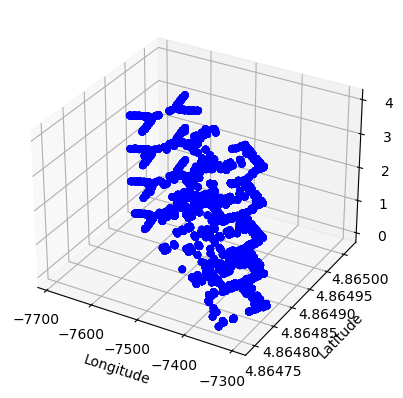

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Extract relevant columns for plotting
x = ujindoor_df['LONGITUDE']
y = ujindoor_df['LATITUDE']
z = ujindoor_df['FLOOR']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c='blue', marker='o')

# Set labels for the axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Floor')

# Show the plot
plt.show()

In [10]:
import plotly.express as px


# Create an interactive 3D scatter plot
fig = px.scatter_3d(ujindoor_df, x='LONGITUDE', y='LATITUDE', z='FLOOR', color='BUILDINGID', hover_name='SPACEID')

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Longitude', yaxis_title='Latitude', zaxis_title='Floor'))

# Show the interactive plot
fig.show()

In [17]:
# process the ujindoor dataset to separate the train dataset by space id and save the different dataframes into separate csvs files labeled by space id

output_dir = "../../ujiindoorloc/UJIndoorLoc/building_ids_csvs/"

# check if output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# get unique building ids
building_ids = np.unique(ujindoor_df['BUILDINGID'])

# for each building id, save the corresponding dataframe into a csv file
for building_id in building_ids:
    building_df = ujindoor_df[ujindoor_df['BUILDINGID'] == building_id]
    # reset index
    building_df = building_df.reset_index(drop=True)
    # for each building, split by floors
    floor_ids = np.unique(building_df['FLOOR'])
    for floor_id in floor_ids:
        floor_df = building_df[building_df['FLOOR'] == floor_id]
        floor_df = floor_df.reset_index(drop=True)
        # for each floor, split by space id
        output_dir_curr = os.path.join(output_dir, str(building_id))
        if not os.path.exists(output_dir_curr):
            os.makedirs(output_dir_curr)
        # save the dataframe into a csv file
        save_path = os.path.join(output_dir_curr, "building_" + str(building_id) + "_floor_" + str(floor_id) +".csv")
        floor_df.to_csv(save_path, index=False)
        # print(floor_df.head())


In [22]:
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21043,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
21044,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
21045,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
21046,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


In [26]:
# estimate ap locations for ujindoor dataset
locs  = ["../../ujiindoorloc/UJIndoorLoc/trainingData.csv", "../../ujiindoorloc/UJIndoorLoc/validationData.csv"]
dfs = []
for loc in locs:
    dfs.append(pd.read_csv(loc))

# concatenate the dataframes
df = pd.concat(dfs, ignore_index = True)

In [27]:
# rename columns
new_column_names = {col: f'AP_{i}' for i, col in enumerate(df.columns[:520])}
df.rename(columns=new_column_names, inplace=True)

In [34]:
scans_df = df.iloc[:, :520]

In [35]:
coords_df = df.iloc[:, 520:522]

In [41]:
# helper functions to get ap points heard, and ap signal stengths
def get_location_indices_signals(df):
    # empty list for all ap points heard and all ap signal strengths
    all_ap_points, all_ap_signals = [], []
    for index, colname in enumerate(df):
        # ignore 100 db readings as they are filler as readMe file said
        # print("Done with AP {}".format(index-1))
        idx = df[colname].index[df[colname] != 100].to_list()
        all_ap_points.append(idx)
        all_ap_signals.append(df[colname].loc[idx])
    return all_ap_points, all_ap_signals

def get_index_coordinates(indices, coords_df):
    # get the coordinates of the aps using indices
    coordinates = coords_df.loc[indices]
    coordinates.columns = ["x", "y"]
    return coordinates["x"].to_numpy(), coordinates["y"].to_numpy()

# use the formula to calculate the coordinates of the APs

def get_ap_weight(rss):
    return 100**(rss/10.0)


def approximate_ap_coordinates(x_coords, y_coords, weights):

    # sum product of weight and coordinate
    estimated_x = np.sum(x_coords * weights)
    estimated_y = np.sum(y_coords * weights)

    # get denominator
    sum_of_weights = weights.sum()
    
    # return tuple of coordinates
    return estimated_x/sum_of_weights , estimated_y/sum_of_weights

def approximate_all_ap_locations(data, coords):
    # get location and signals
    all_ap_points, all_ap_signals = get_location_indices_signals(data)
    estimated_ap_locs = []
    # check the length of them both are the same
    assert len(all_ap_points) == len(all_ap_signals)
    for i in range(len(all_ap_points)):
        # get ap indices and rss strengths
        idx, signals = all_ap_points[i], all_ap_signals[i]
        # get coordinates of the scans
        xs, ys = get_index_coordinates(idx, coords)
        # get weights
        weights = np.asarray([get_ap_weight(signal) for signal in signals])
        # get estimated coordinates
        estimated_coords = approximate_ap_coordinates(xs, ys, weights)
        estimated_ap_locs.append(list(estimated_coords))
    return np.asarray(estimated_ap_locs)

def save_estimated_coordinates(scans, coords, save_loc):
    # get the estimated coordinates
    estimated_coords = approximate_all_ap_locations(scans, coords)
    # create dataframe
    df = pd.DataFrame(estimated_coords, columns=["x", "y"])
    # save the dataframe
    df.to_csv(save_loc, index=False)
    return df

df_ap_coords_save_loc = "../data/raw/ujindoorloc_ap_coords.csv"
estimated_ap_locs = save_estimated_coordinates(scans_df, coords_df, df_ap_coords_save_loc)

In [ ]:
# split test dataset
